In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./QAT_results.csv")
df.head()

,int bitwidth,fract bitwidth,best recall 1kHz on validation data,10kHz recall on validation data,30kHz recall on validation data,auroc on validation data,full bitwidth,relative power cost compared to full precision,full precision best_val_recall_on_1kHz,full precision best_val_recall_on_10kHz,full precision best_val_recall_on_30kHz,full precision val_auroc_on_best_val_recall,recall 1kHz per relative cost,recall 10kHz per relative cost,recall 30kHz per relative cost,auroc per relative cost
0,2,4,0.0650,0.1624,0.2239,0.9400,6,0.035156,0.5575,0.6672,0.7592,0.987,1.848889,4.619378,6.368711,26.737778
1,2,8,0.1829,0.1829,0.3322,0.4766,10,0.097656,0.5575,0.6672,0.7592,0.987,1.872896,1.872896,3.401728,4.880384
2,2,12,0.3017,0.3938,0.4944,0.9740,14,0.191406,0.5575,0.6672,0.7592,0.987,1.576229,2.057404,2.582988,5.088653
3,4,4,0.0035,0.0174,0.0321,0.8020,8,0.062500,0.5575,0.6672,0.7592,0.987,0.056000,0.278400,0.513600,12.832000
4,4,8,0.3861,0.5857,0.7053,0.9860,12,0.140625,0.5575,0.6672,0.7592,0.987,2.745600,4.164978,5.015467,7.011556


In [3]:
result = df.pivot(index='int bitwidth', columns='fract bitwidth', values='recall 1kHz per relative cost')

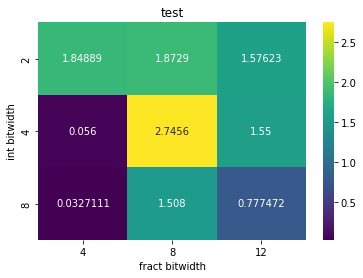

In [4]:
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("test")
plt.show()

In [8]:
value_l = [
    'best recall 1kHz on validation data','10kHz recall on validation data',
    '30kHz recall on validation data', 'auroc on validation data',
    'recall 1kHz per relative cost', 'recall 10kHz per relative cost', 
    'recall 30kHz per relative cost', 'auroc per relative cost'
]
full_precision_dict = {
    'auroc on validation data': 'full precision val_auroc_on_best_val_recall',

}
df = pd.read_csv("./QAT_results.csv")
for value in value_l:
    result = df.pivot(index='int bitwidth', columns='fract bitwidth', values=value)
    if value in full_precision_dict.keys():
        full_precision_val = full_precision_dict[value]
        result.insert(3,"full precision", df[full_precision_val][0])
    sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
    plt.title(value)
    plt.savefig(f"{value}_heatmap.png", dpi=300)
    plt.clf()


<Figure size 432x288 with 0 Axes>

In [11]:
result.insert(3,"full precision", df["full precision val_auroc_on_best_val_recall"][0])

In [13]:
df["full precision val_auroc_on_best_val_recall"]

0    0.987
1    0.987
2    0.987
3    0.987
4    0.987
5    0.987
6    0.987
7    0.987
8    0.987
Name: full precision val_auroc_on_best_val_recall, dtype: float64